In [30]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

from tqdm.notebook import tqdm, trange

In [31]:
class SineDataset(Dataset):
    def __init__(self, n_size=1000):
        self.x_data = torch.rand(n_size, 1) * 18 - 9
        self.y_data = torch.sin(self.x_data)/2.5
        self.y_data += torch.randn_like(self.y_data) / 20

    def __len__(self):
        return self.x_data.shape[0]
    
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

In [32]:
train_dataset = SineDataset(30000)
test_dataset = SineDataset(8000)

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False)

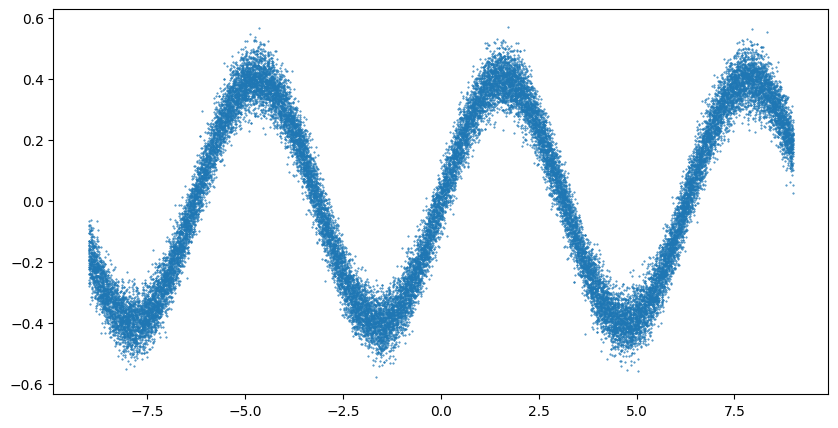

In [33]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(train_dataset.x_data, train_dataset.y_data, s = 0.2)

In [34]:
class ShallowLinear(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(ShallowLinear, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, hidden_size)
        self.linear4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.tanh(x)
        x = self.linear2(x)
        x = torch.tanh(x)
        x = self.linear3(x)
        x = torch.tanh(x)
        x = self.linear4(x)
        return x



In [35]:
shallowlinear = ShallowLinear(input_size=1, output_size=1, hidden_size=64)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(shallowlinear.parameters(), lr=5e-4)

In [36]:
epochs = 10
accuracy_logger = []
train_loss = []
test_loss = []
y_test_hat_logger = []

for epoch in trange(epochs, desc="Epochs", leave=False):
    for x, y in tqdm(train_dataloader, desc="Training Batches", leave=False):

        y_train_hat = shallowlinear(x)
        loss = loss_function(y_train_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

    with torch.no_grad():
        for x, y in tqdm(test_dataloader, desc="Test Batches", leave=False):
            y_test_hat = shallowlinear(x)
            loss = loss_function(y_test_hat, y)

            test_loss.append(loss.item())
            if epoch == 10:
                y_test_hat_logger.append(y_test_hat.detach().numpy())

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Test Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Text(0, 0.5, 'Loss')

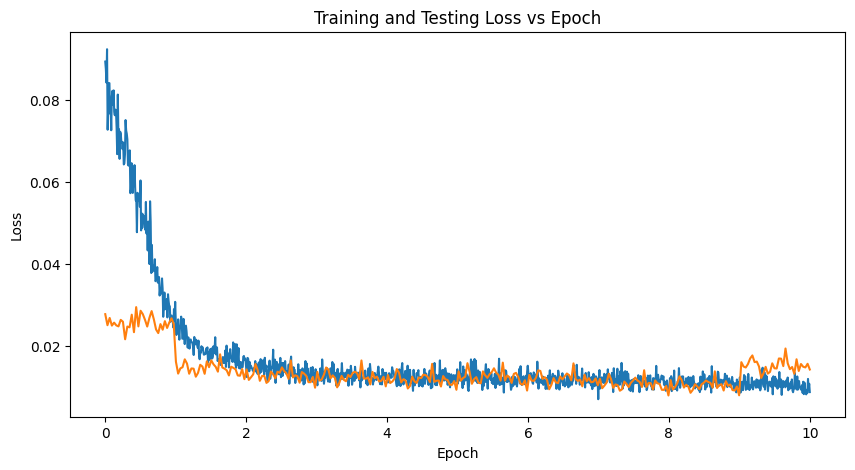

In [37]:
fig = plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, epochs, len(train_loss)), train_loss)
plt.plot(np.linspace(0, epochs, len(test_loss)), test_loss)
plt.title("Training and Testing Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [39]:
test_outputs = []
# Perform a test Loop!
with torch.no_grad():
    for x, y in test_dataloader:
        # Run forward calculation
        y_predict = shallowlinear(x)
        test_outputs.append(y_predict.detach().cpu().numpy())
        
test_outputs = np.concatenate(test_outputs)

Text(-9, 0.48, '- Sine wave (with noise)')

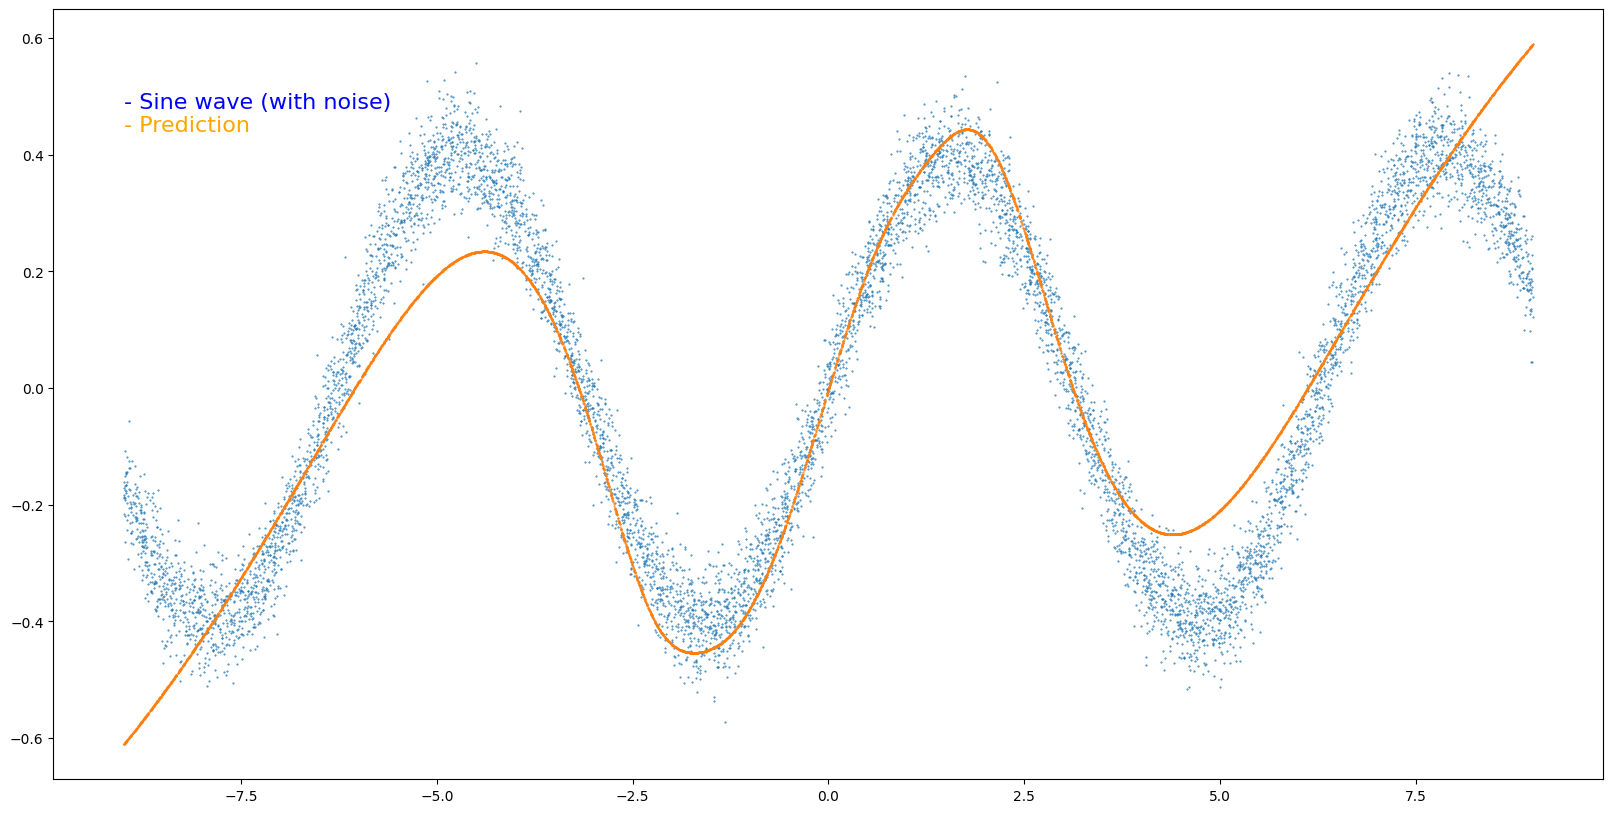

In [40]:
# Plot the testdata against the model's predicted outputs, how accurate is it?
fig = plt.figure(figsize=(20, 10))
plt.scatter(test_dataset.x_data, test_dataset.y_data, s=0.2)
plt.scatter(test_dataset.x_data, test_outputs, s=0.2)
plt.text(-9, 0.44, "- Prediction", color="orange", fontsize=16)
plt.text(-9, 0.48, "- Sine wave (with noise)", color="blue", fontsize=16)